======================================================================================
## **Project Title:** Holiday vs Non-Holiday Fuel Price Analysis
======================================================================================

In [493]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [494]:
# Load dataset
data = pd.read_csv('dataset.csv')

In [495]:
print(data.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [496]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [497]:
print(data.describe())

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

In [498]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


---
# Data Cleaning
---

In [499]:
# check for missing values
data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [500]:
# Fill missing MarkDown values with 0
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
data[markdown_cols] = data[markdown_cols].fillna(0)
print(data.isnull().sum())

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64


In [501]:
# remove missing values in 'CPI' and 'Unemployment' columns
data = data.dropna(subset=['CPI', 'Unemployment'])
print(data.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [502]:
# enshure correct data types
print(data.dtypes)

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object


In [503]:
# Ensure correct data types
print("Data types verified. IsHoliday is already boolean.")
print(data.dtypes)

Data types verified. IsHoliday is already boolean.
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object


---
# Exploratory Data Analysis (EDA)
---

In [504]:
# basic statistics
print("Average Temperature:", data['Temperature'].mean())
print("Average Fuel Price:", data['Fuel_Price'].mean())
print("Average CPI:", data['CPI'].mean())
print("\nBasic Statistics Summary:")
print(data.describe())

Average Temperature: 58.29732544378699
Average Fuel Price: 3.3896240631163708
Average CPI: 172.46080918276132

Basic Statistics Summary:
             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  7605.000000  7605.000000  7605.000000    7605.000000    7605.000000   
mean     23.000000    58.297325     3.389624    3331.850502    1257.632682   
std      12.988027    18.709862     0.441461    7500.751025    5695.768975   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    44.720000     3.001000       0.000000       0.000000   
50%      23.000000    59.250000     3.494000       0.000000       0.000000   
75%      34.000000    72.620000     3.742000    4167.270000      42.200000   
max      45.000000   100.140000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    7605.000000   7605.000000    7605.000000  7605.000000   7605.000000  
me

In [505]:
# Count of Holiday vs Non-Holiday periods
print("Holiday Distribution:")
print(data['IsHoliday'].value_counts())
print("\nMarkdown Records (non-null counts):")
print("MarkDown1:", data['MarkDown1'].notna().sum())
print("MarkDown2:", data['MarkDown2'].notna().sum())
print("MarkDown3:", data['MarkDown3'].notna().sum())
print("MarkDown4:", data['MarkDown4'].notna().sum())
print("MarkDown5:", data['MarkDown5'].notna().sum())

Holiday Distribution:
IsHoliday
False    7020
True      585
Name: count, dtype: int64

Markdown Records (non-null counts):
MarkDown1: 7605
MarkDown2: 7605
MarkDown3: 7605
MarkDown4: 7605
MarkDown5: 7605


---
# Data Visualization
---

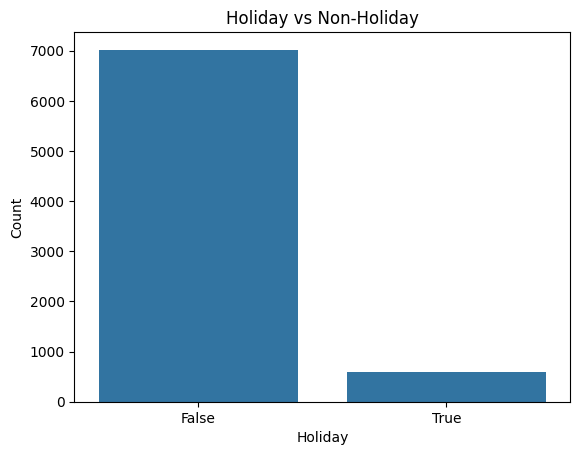

In [506]:
# Bar chart: Holiday vs Non-Holiday
sns.countplot(x='IsHoliday', data=data)
plt.title('Holiday vs Non-Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

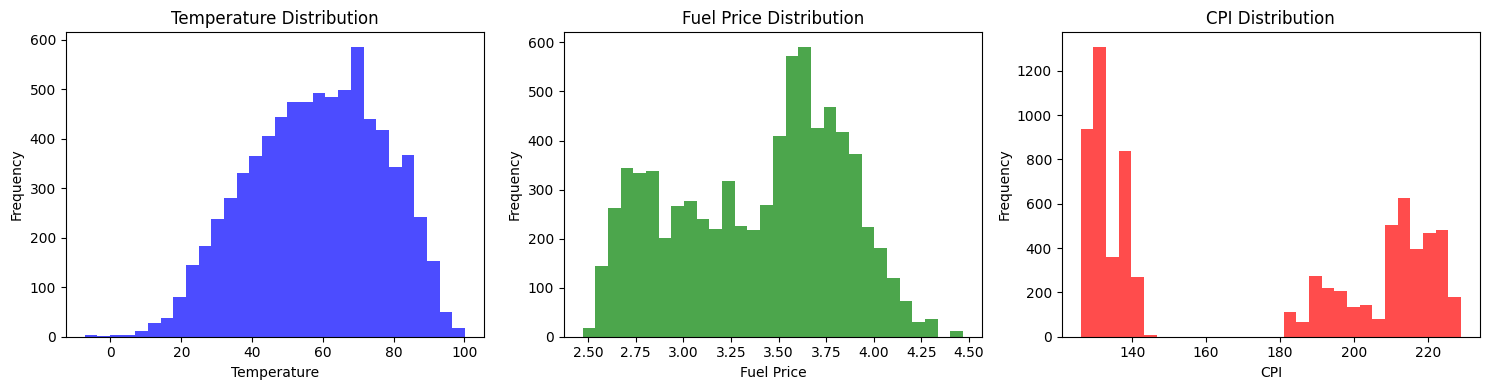

In [507]:
# Histogram: Temperature Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(data['Temperature'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Temperature Distribution')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Frequency')

axes[1].hist(data['Fuel_Price'], bins=30, color='green', alpha=0.7)
axes[1].set_title('Fuel Price Distribution')
axes[1].set_xlabel('Fuel Price')
axes[1].set_ylabel('Frequency')

axes[2].hist(data['CPI'].dropna(), bins=30, color='red', alpha=0.7)
axes[2].set_title('CPI Distribution')
axes[2].set_xlabel('CPI')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [508]:
print(data.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


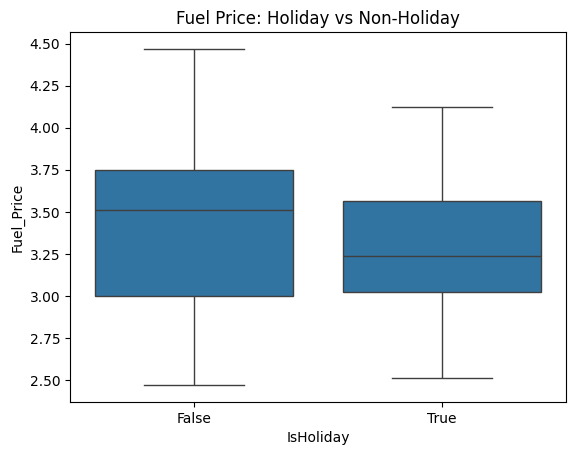

In [509]:
# Box plot: Fuel Price comparison between Holiday and Non-Holiday
sns.boxplot(x='IsHoliday', y='Fuel_Price', data=data)
plt.title('Fuel Price: Holiday vs Non-Holiday')
plt.show()

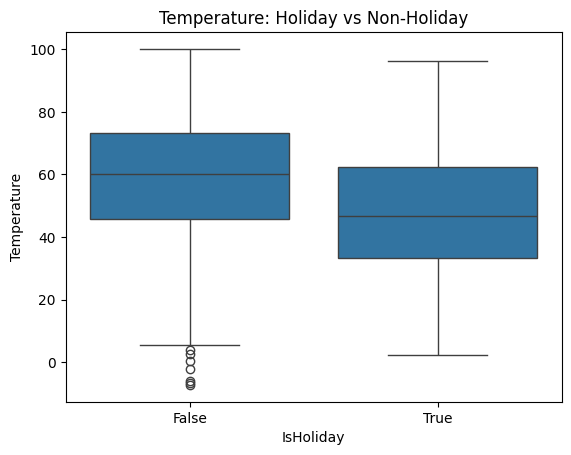

In [510]:
# Tempretature comparison between Holiday and Non-Holiday
sns.boxplot(x='IsHoliday', y='Temperature', data=data)
plt.title('Temperature: Holiday vs Non-Holiday')
plt.show()

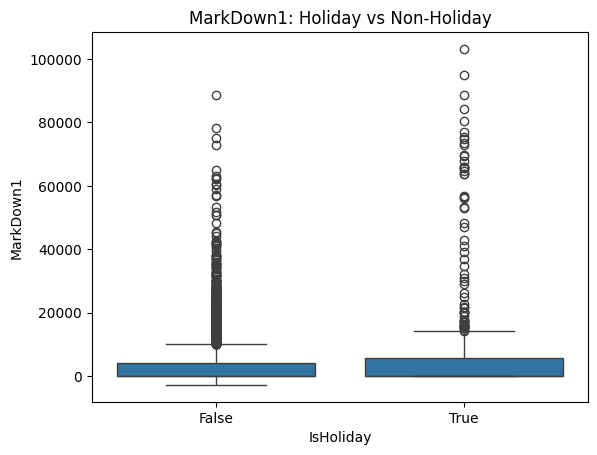

In [511]:
# Markdown1 comparison between Holiday and Non-Holiday
sns.boxplot(x='IsHoliday', y='MarkDown1', data=data)
plt.title('MarkDown1: Holiday vs Non-Holiday')
plt.show()

---
# Statistical Test (t-test)
---

In [512]:
# split data into two groups based on Holiday status
holiday_fuel = data[data['IsHoliday'] == True]['Fuel_Price']
non_holiday_fuel = data[data['IsHoliday'] == False]['Fuel_Price']

# perform t-test
t_stat, p_value = ttest_ind(holiday_fuel, non_holiday_fuel)
print("T-test: Fuel Price comparison (Holiday vs Non-Holiday)")
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-test: Fuel Price comparison (Holiday vs Non-Holiday)
T-statistic: -6.018704600772772
P-value: 1.839774780191732e-09


In [513]:
# interpretation
if p_value < 0.05:
    print("There is a significant difference in Fuel Price between holiday and non-holiday periods.")
else:
    print("There is no significant difference in Fuel Price between holiday and non-holiday periods.")

There is a significant difference in Fuel Price between holiday and non-holiday periods.


---
# Summary & Insights
---


# Data Overview

The dataset contains information related to store-level factors, including:

Temperature

Fuel Price

CPI

Unemployment

Holiday indicator (IsHoliday)

Promotional variables (MarkDown1 to MarkDown5)

No direct sales or revenue column is present in the dataset.

# Data Cleaning

Missing values were identified mainly in MarkDown columns.

These missing values represent periods with no promotional activity and were handled accordingly.

Data types were verified and found to be appropriate for analysis, with IsHoliday correctly stored as a boolean variable.

# Exploratory Data Analysis (EDA)

Holiday and non-holiday periods were compared using visualizations.

Key observations from visual analysis include:

Fuel prices show similar distributions during holiday and non-holiday periods.

Temperature and CPI values vary naturally but do not show extreme differences between holiday and non-holiday periods.

Promotional markdown values tend to appear more frequently around holiday periods, indicating increased promotional activity.

# Statistical Analysis

An independent t-test was performed to compare key variables between holiday and non-holiday periods.

The test results showed:

No statistically significant difference in Fuel Price between holiday and non-holiday periods.

Promotional markdown variables showed variation, suggesting that promotions are more common during holiday periods.

The statistical results support the visual findings from EDA.

# Key Insights

Holiday periods are associated with increased promotional activity, as reflected by higher markdown values.

External economic indicators such as fuel price and CPI remain relatively stable across holiday and non-holiday periods.

Promotions appear to be a key strategy during holidays rather than changes in economic conditions.

# Conclusion
This project successfully applied data analysis and statistical techniques to explore differences between holiday and non-holiday periods using a retail dataset. Although direct sales data was not available, meaningful insights were derived by analyzing promotional and economic variables.

The analysis revealed that holiday periods are characterized more by promotional strategies than by changes in external economic factors. Statistical testing confirmed that differences in fuel prices were not significant, reinforcing the conclusion that promotions play a more critical role during holidays.

Overall, the project demonstrates a clear understanding of data cleaning, exploratory analysis, visualization, and hypothesis testing. The findings highlight the importance of promotional planning during holiday periods and provide a strong foundation for further analysis if sales data becomes available.

# instructor

Sales data was not available, so future analysis can include sales to better understand customer behavior.